In [2]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [4]:
%matplotlib inline

In [5]:
shp_path = "GeoFile/tl_2017_us_state.shp"
sf = shp.Reader(shp_path)

In [6]:
len(sf.shapes())

56

In [41]:
#Searching an index 
sf.records()[1][5]

'FL'

In [8]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [9]:
df = read_shapefile(sf)
df.shape

(56, 15)

In [10]:
df.sample(5)

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,coords
12,4,8,35,00897535,35,NM,New Mexico,00,G4000,A,314191415563,733669653,+34.4346843,-106.1316181,"[(-106.006316, 36.995267), (-106.005314, 36.99..."
22,3,6,01,01779775,01,AL,Alabama,00,G4000,A,131174431216,4592944701,+32.7396323,-086.8434593,"[(-88.139988, 34.581703), (-88.139969, 34.5818..."
25,3,7,48,01779801,48,TX,Texas,00,G4000,A,676641930188,19017521093,+31.4347032,-099.2818238,"[(-103.98017899999999, 32.000125), (-103.97993..."
42,2,3,26,01779789,26,MI,Michigan,00,G4000,A,146488062160,103998746281,+44.8441757,-085.6604930,"[(-86.46412, 45.32481), (-86.464518, 45.324974..."
38,1,2,36,01779796,36,NY,New York,00,G4000,A,122048992746,19247151848,+42.9133974,-075.5962723,"[(-74.047133, 40.690542), (-74.04710399999999,..."


In [11]:
df[df.NAME=='Massachusetts']

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,coords
51,1,1,25,00606926,25,MA,Massachusetts,00,G4000,A,20204287539,7130763257,+42.1565196,-071.4895915,"[(-71.49825899999999, 42.017272), (-71.499065,..."


In [29]:
y_lim = (23, 50) # latitude 
x_lim = (-128, -65) # longitude
plot_map(sf, x_lim, y_lim)

NameError: name 'plot_map' is not defined

In [46]:
def plot_map_fill_multiples_ids(title, comuna, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0][5] for i in shape.shape.points[:]]
        y = [i[1][5] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')

    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        

In [47]:
x

NameError: name 'x' is not defined

TypeError: 'float' object is not subscriptable

<Figure size 1080x648 with 0 Axes>

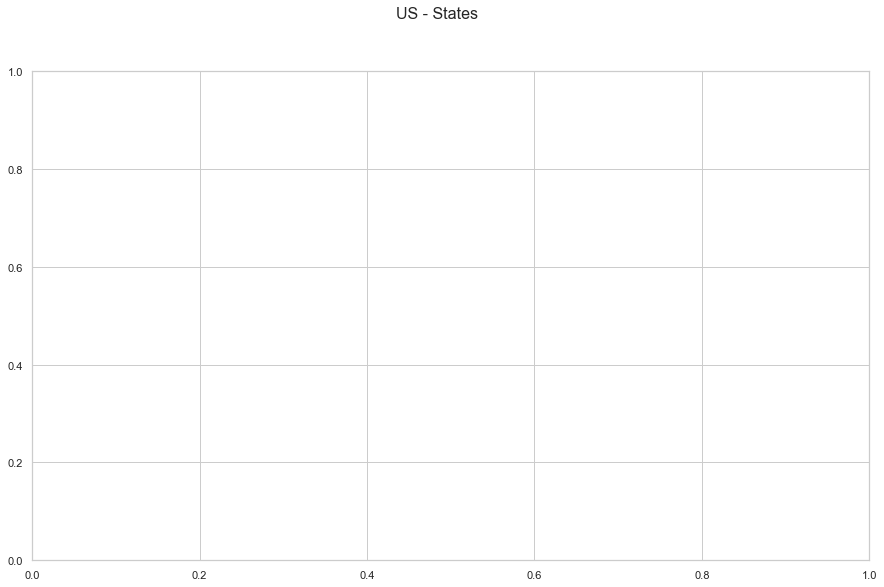

In [44]:
state_id = ['FL']
plot_map_fill_multiples_ids("US - States", state_id, sf, x_lim, 
                             y_lim, color = 'r', figsize = (15,9))

In [ ]:
def plot_map(sf, x_lim = (23, 50), y_lim = (-128, -65), figsize = (15,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [24]:
plot_map(sf)

NameError: name 'plot_map' is not defined